In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


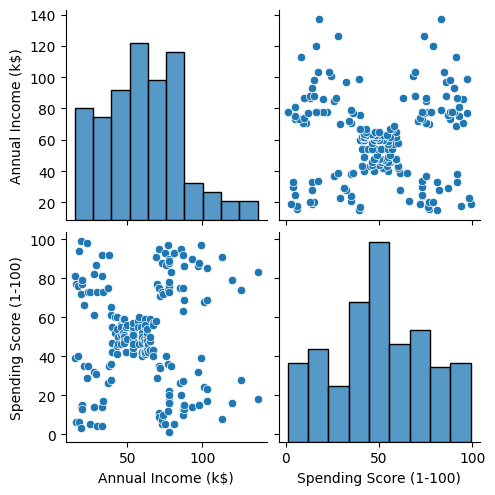

In [17]:
df.head(), df.describe()
sns.pairplot(df[['Annual Income (k$)','Spending Score (1-100)']])
plt.show()


In [18]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

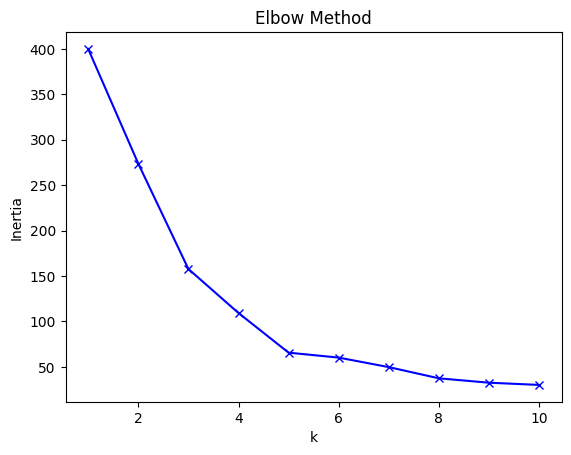

In [19]:
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')
plt.show()


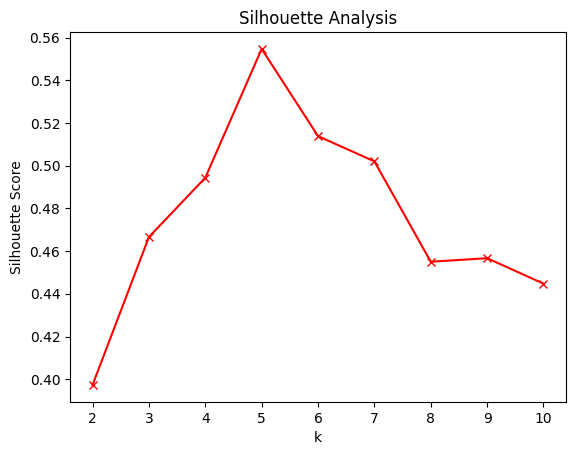

In [20]:
sil = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil.append(silhouette_score(X_scaled,labels))

plt.figure()
plt.plot(range(2,11), sil, 'rx-')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Analysis')
plt.show()

In [21]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


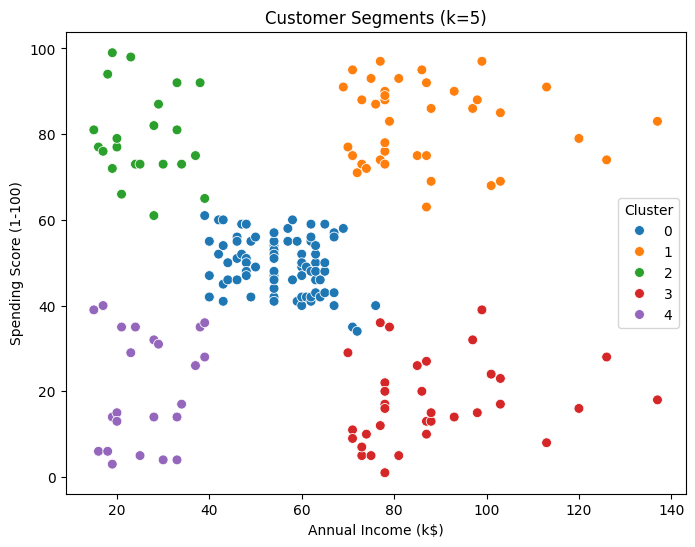

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='tab10', s=50)
plt.title(f'Customer Segments (k={best_k})')
plt.show()

In [23]:
df.to_csv('clustered_customers.csv', index=False)